# Credit card fraud detection

Importing libries

In [72]:
# Importing libries (hetre we are going to import all the libries that need to read the csv file ,working with (arrays and metrices),data visualizing libries,data spliting lbries,models library and model evaluation libries)

#for read the csv file
import pandas as pd

#for arrays and metrices
import numpy as np

#for data visulizing
import matplotlib.pyplot as plt
import seaborn as sns

#Data pre processing

from sklearn.preprocessing import StandardScaler

#for data splitting
from sklearn.model_selection import train_test_split


#for modle building 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Model evaluaion
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [21]:
#loading the data set 
credit_card = pd.read_csv('C:/Users/Janith Manaranga/Documents/sllit_assignment/dataset/creditcard_2023.csv')

In [22]:
#head(first 5 rows) of data set
print(credit_card.head())

#tail(last 5 rows) of data set
print(credit_card.tail())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

According to data set we have 568629 data records

## Data Preprocessing 

In [23]:
#Checking for missing values
credit_card.isnull().sum() 

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
#checking null values and data type
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

The dataset has two integer columns (Id and class) and 29 float columns. The dataset does not have any null values

In [25]:
#Removing id column
credit_card.drop('id', inplace = True, axis = 1)

In [26]:
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


We don't need to apply data preprocessing techniques for this dataset, as it is already very balanced

## Data visualization

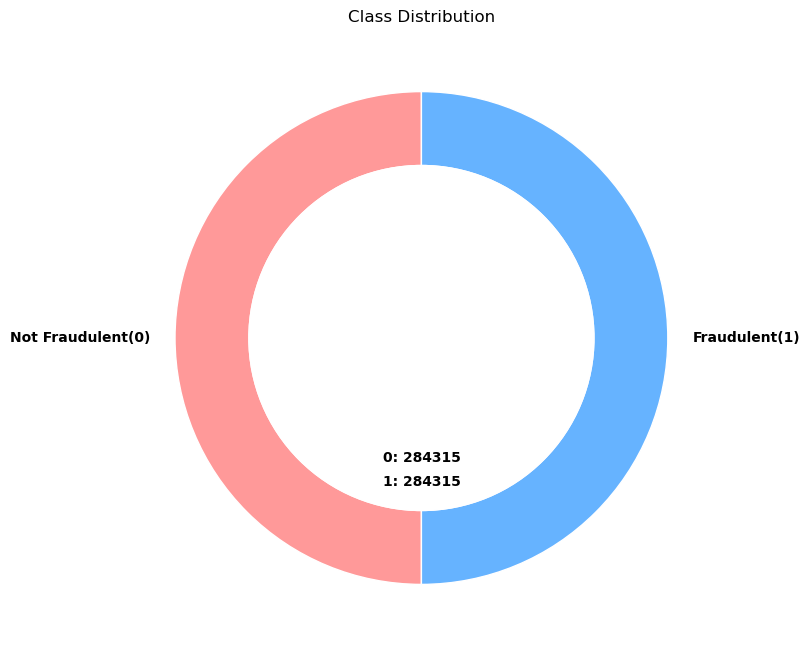

In [27]:
# Calculate the count of each class
class_counts = credit_card['Class'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))

# Colors for the donut chart
colors = ['#ff9999', '#66b3ff']

# Create a pie chart for the outer circle
wedges, texts, autotexts = plt.pie(class_counts, labels=['Not Fraudulent(0)', 'Fraudulent(1)'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))


plt.setp(autotexts, size=10, weight="bold", color="white")  
plt.setp(texts, size=10, weight="bold")  
plt.setp(wedges, width=0.3, edgecolor='w')  
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white', fc='white')) 

# Add count labels for each class
for i, (class_label, count) in enumerate(class_counts.items()):
    plt.text(0, -0.5 - i*0.1, f'{class_label}: {count}', fontsize=10, weight="bold", ha='center')


plt.title('Class Distribution')


plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

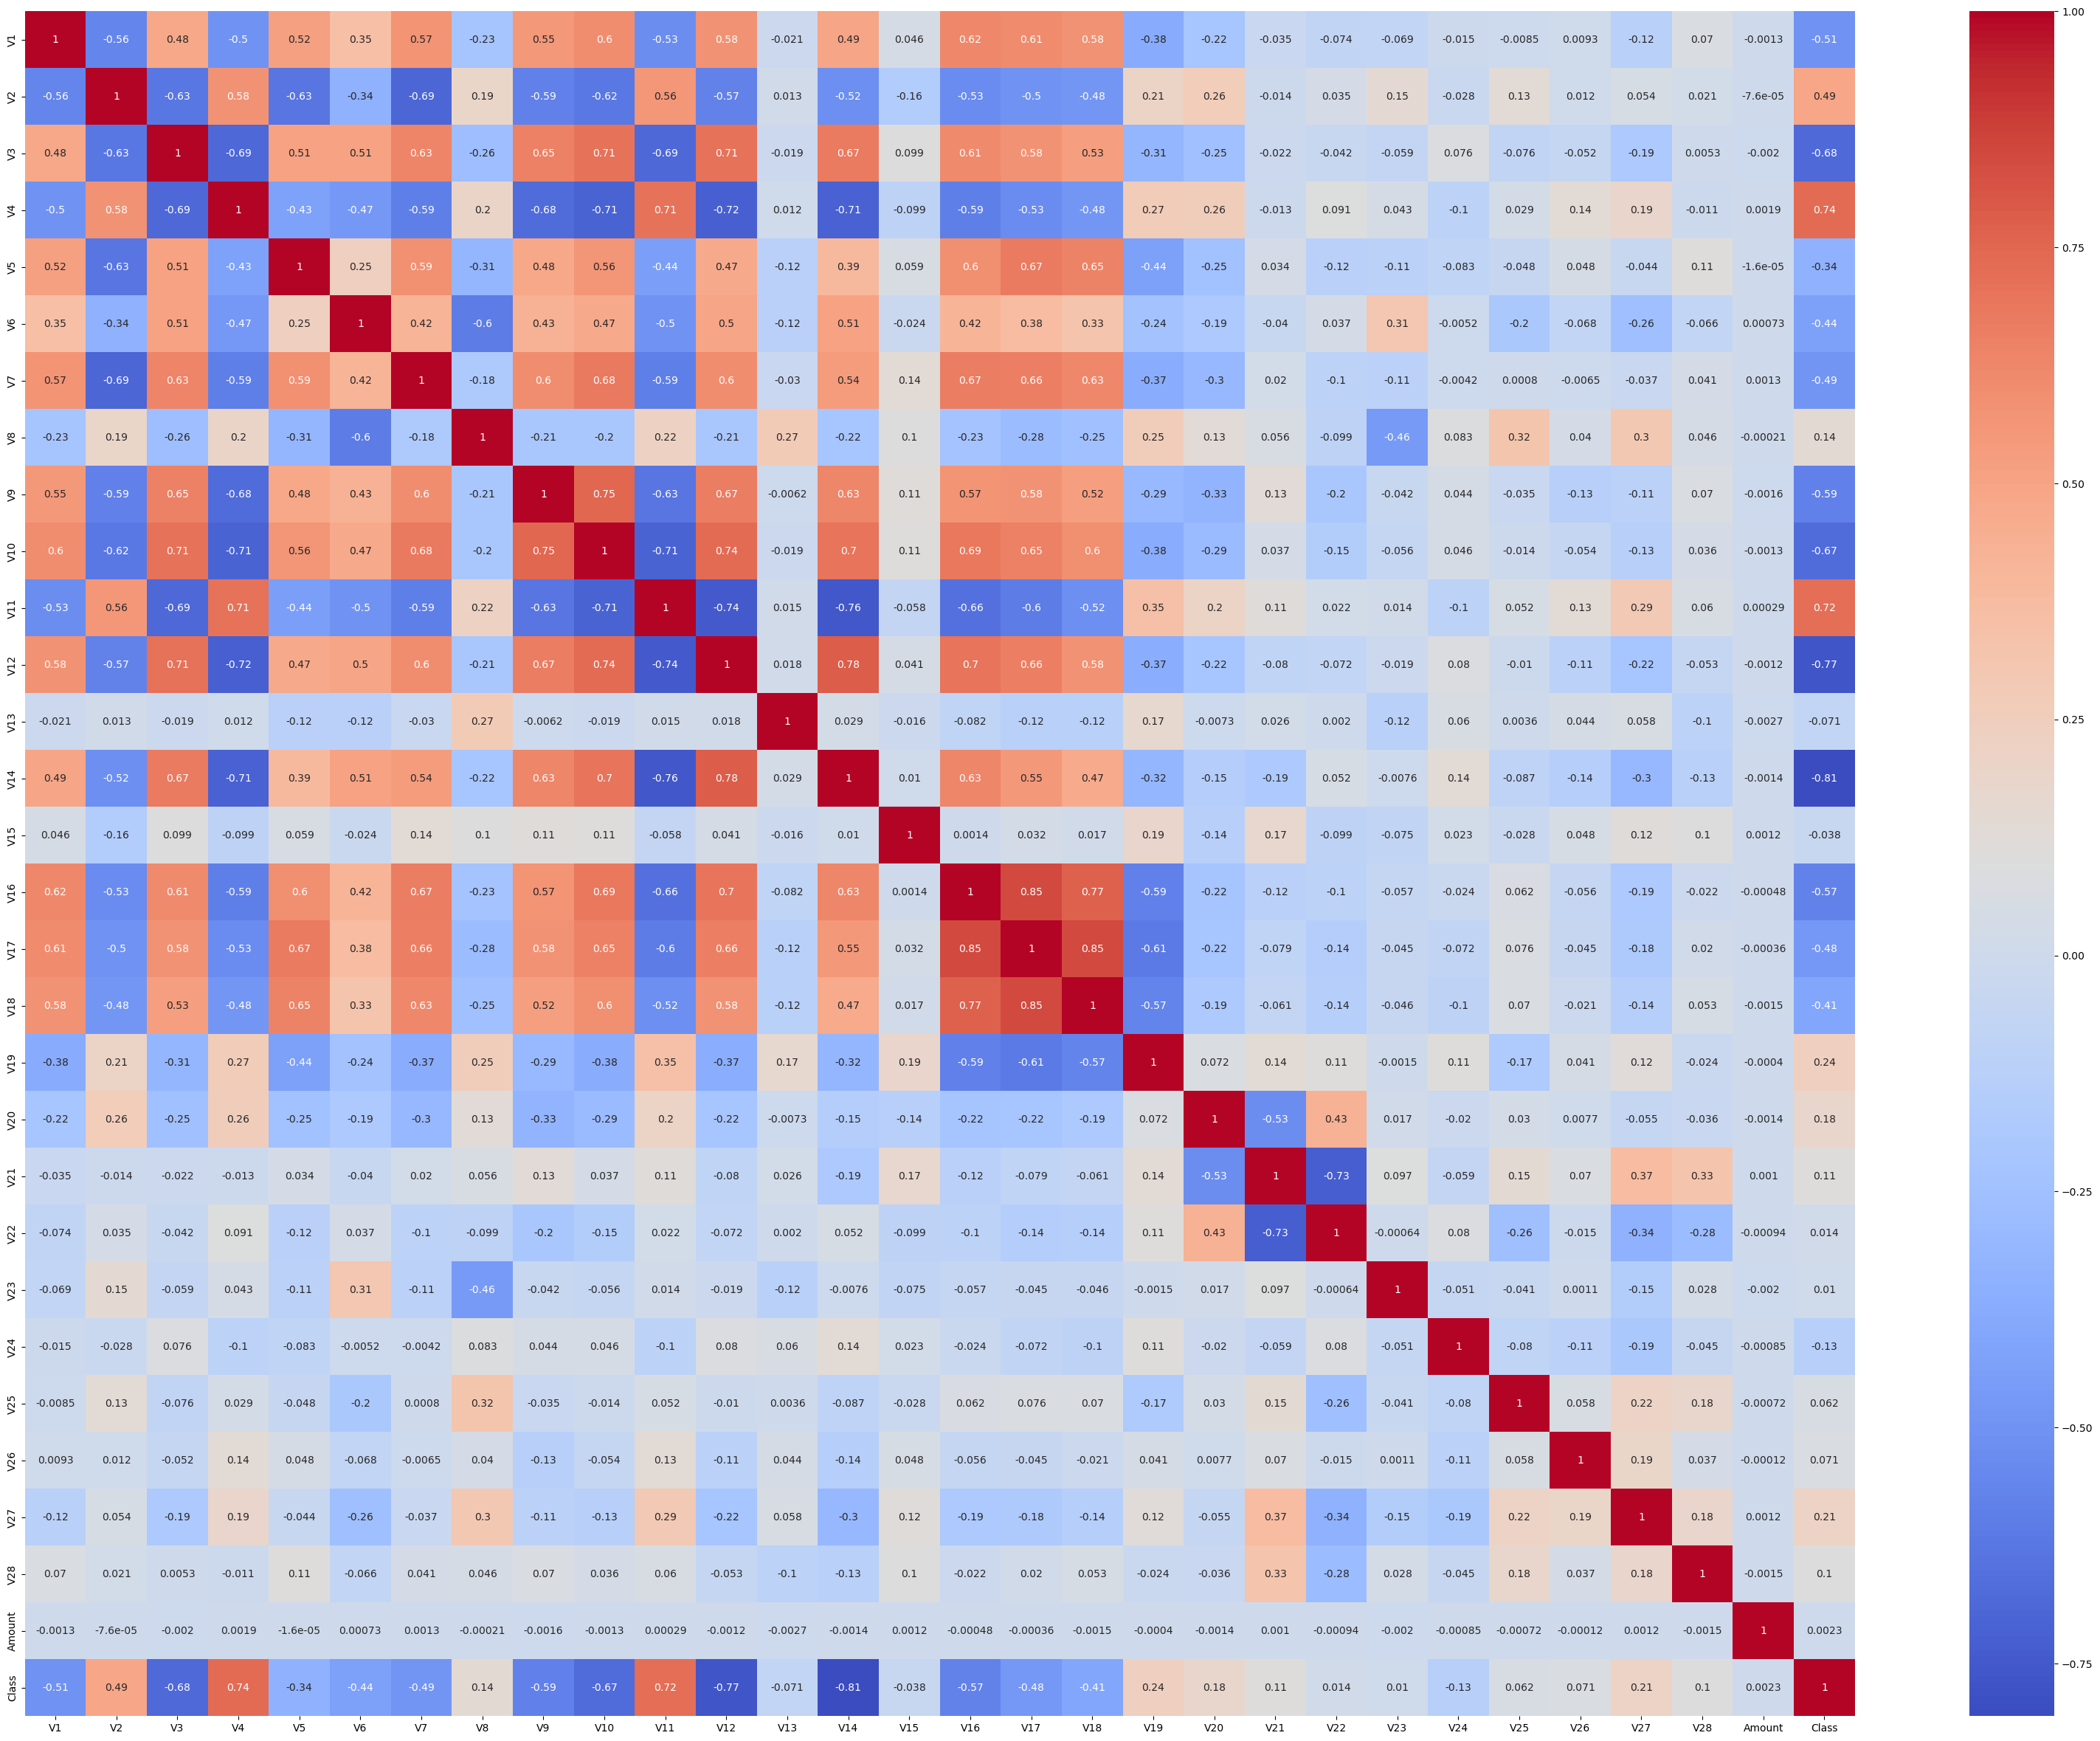

In [92]:
# Plotting the heatmap
plt.figure(figsize = (40,30))
sns.heatmap(credit_card.corr(), cmap = 'coolwarm', annot = True)
plt.show

•	Based on the hues of shades of white or gray, the majority of variables show a low to moderate association with the 'Class' target.
•	A greater negative connection with the 'Class' aim is shown by some variables, including V10, V14, and V12. These variables exhibit a darker shade of red.
•	In contrast, a lighter shade of blue is displayed by variables like V11, V2, and   V4, which point to a favorable association with the 'Class' target.
•	As seen by the color near zero on the scale, the Amount feature and the 'Class' target have very little association.


## Model Building

In [29]:
#Splitting data set into X and y
X = credit_card.drop('Class', axis=1)  
y = credit_card['Class']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (568630, 29)
y shape: (568630,)


In [30]:
#Splitting the dataset into training,testing and validation data.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Here we going to identify the best-fit model for credit card fraud detection. To achieve this, we have selected four machine learning models.

1.Logistic regression

In [31]:
# Logistic Regression model and training the model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#prediction on testing data 
y_pred_logistic_regression = logistic_regression.predict(X_test)
y_pred_logistic_regression

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [33]:
y_test

309957    1
37357     0
207866    0
512236    1
244372    0
         ..
235762    0
199417    0
495207    1
507602    1
270838    0
Name: Class, Length: 56863, dtype: int64

In [34]:
# prediction on validation data and evaluate the model on validation set
y_pred_val_lr = logistic_regression.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val_lr)
print("Validation Accuracy Score:", accuracy_val)

Validation Accuracy Score: 0.9577229481385083


In [35]:
#prediction on testing data and evaluate the model on test set
y_pred_lr = logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_lr)
print("  Accuracy Score:", accuracy_logistic_regression)

 Testing Accuracy Score: 0.9582153597242495


In [54]:
# predictions on the training data and training accuracy
y_train_pred_lr = logistic_regression.predict(X_train)
training_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print("Training Accuracy Score:", training_accuracy_lr)

Training Accuracy Score: 0.9581691961380863


In [36]:
#Classification report
print("******Logistic Regression Classification Report *****")
print(classification_report(y_test, y_pred_logistic_regression))

******Logistic Regression Classification Report *****
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28105
           1       0.98      0.94      0.96     28758

    accuracy                           0.96     56863
   macro avg       0.96      0.96      0.96     56863
weighted avg       0.96      0.96      0.96     56863



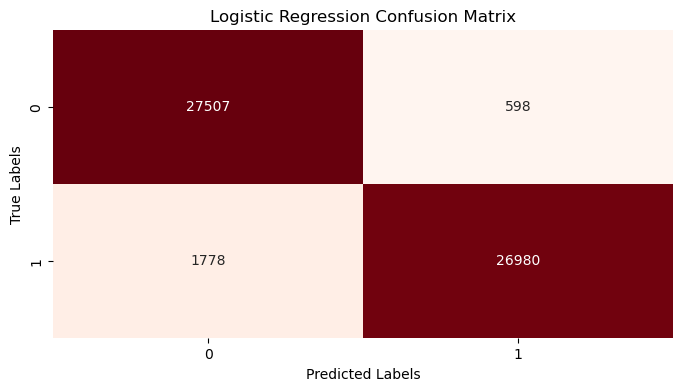

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 4))
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
sns.heatmap(conf_matrix_logistic_regression, annot=True, fmt='d', cmap="Reds", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

2.Decision Tree

In [39]:
# Decision Tree model and training the model
Decision_Tree= DecisionTreeClassifier(random_state=42)
Decision_Tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
#prediction on testing data 
y_pred_Decision_Tree = Decision_Tree.predict(X_test)
y_pred_Decision_Tree

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
y_test

309957    1
37357     0
207866    0
512236    1
244372    0
         ..
235762    0
199417    0
495207    1
507602    1
270838    0
Name: Class, Length: 56863, dtype: int64

In [45]:
# Prediction on validation data and evaluate the model on the validation set
y_pred_val_dr = Decision_Tree.predict(X_val)
accuracy_val_dr = accuracy_score(y_val, y_pred_val_dr)
print("Validation Accuracy Score decision tree:", accuracy_val_dr)


Validation Accuracy Score decision tree: 0.9982413871937815


In [61]:
#Prediction on test data and evaluate the model on the test set
y_pred_Decision_Tree = Decision_Tree.predict(X_test)
accuracy_Decision_Tree = accuracy_score(y_test, y_pred_Decision_Tree)
print("Testing Accuracy Score decision tree:", accuracy_Decision_Tree)

Testing Accuracy Score decision tree: 0.9980127675289732


In [55]:
# predictions on the training data and training accuracy
y_train_pred_dr = Decision_Tree.predict(X_train)
training_accuracy_dr = accuracy_score(y_train, y_train_pred_dr)
print("Training Accuracy Score:", training_accuracy_dr)

Training Accuracy Score: 1.0


In [56]:
#Classification report Decision Tree
print("******Decision Tree Classification Report *****")
print(classification_report(y_test, y_pred_Decision_Tree))

******Decision Tree Classification Report *****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28105
           1       1.00      1.00      1.00     28758

    accuracy                           1.00     56863
   macro avg       1.00      1.00      1.00     56863
weighted avg       1.00      1.00      1.00     56863



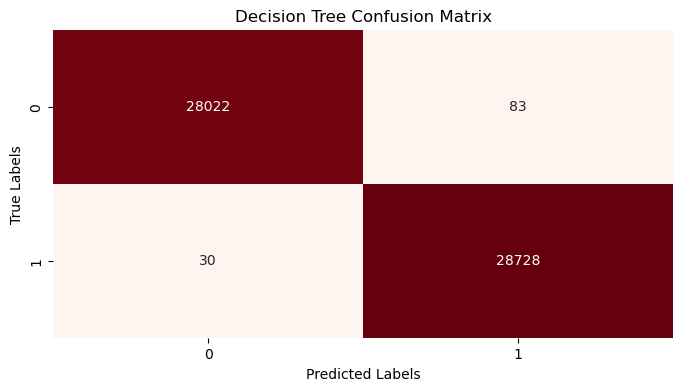

In [58]:
#Evaluate the model
plt.figure(figsize=(8, 4))
conf_matrix_Decision_Tree = confusion_matrix(y_test,y_pred_Decision_Tree)
sns.heatmap(conf_matrix_Decision_Tree, annot=True, fmt='d', cmap="Reds", cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3.Random forest

In [51]:
# Random forest model and training the model
Random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
Random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_Random_forest_model = Random_forest_model.predict(X_test)
y_pred_Random_forest_model

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [60]:
y_test

309957    1
37357     0
207866    0
512236    1
244372    0
         ..
235762    0
199417    0
495207    1
507602    1
270838    0
Name: Class, Length: 56863, dtype: int64

In [62]:
# Prediction on validation data and evaluate the model on the validation set
y_pred_val_rf = Random_forest_model.predict(X_val)
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Validation Accuracy Score random forest:", accuracy_val_rf)

Validation Accuracy Score random forest: 0.9998768971035648


In [63]:
#Prediction on test data and evaluate the model on the test set
y_pred_rf = Random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Testing Accuracy Score random forest:", accuracy_rf)

Testing Accuracy Score random forest: 0.9998944832316269


In [64]:
# predictions on the training data and training accuracy
y_train_pred_rf = Random_forest_model.predict(X_train)
training_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy Score random forest:", training_accuracy_rf)

Training Accuracy Score random forest: 1.0


In [65]:
#Classification report Random forest
print("******Random forest Classification Report *****")
print(classification_report(y_test, y_pred_Random_forest_model))

******Random forest Classification Report *****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28105
           1       1.00      1.00      1.00     28758

    accuracy                           1.00     56863
   macro avg       1.00      1.00      1.00     56863
weighted avg       1.00      1.00      1.00     56863



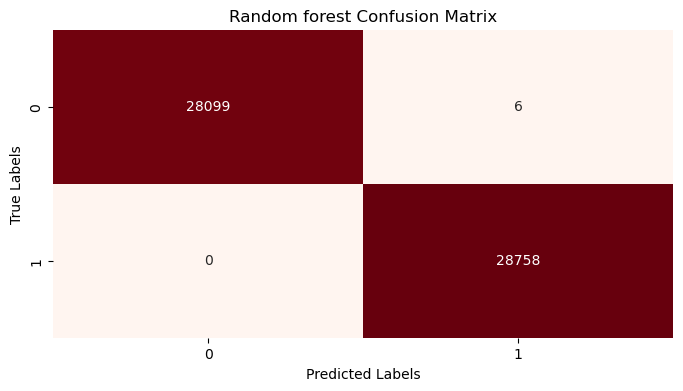

In [67]:
#Ploting confusion matrix
plt.figure(figsize=(8, 4))
conf_matrix_y_pred_Random_forest_model = confusion_matrix(y_test,y_pred_Random_forest_model)
sns.heatmap(conf_matrix_y_pred_Random_forest_model, annot=True, fmt='d', cmap="Reds", cbar=False)
plt.title('Random forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

4.XG Boost

In [82]:
# Convert data into DMatrix format
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
d_val = xgb.DMatrix(X_val, label=y_val) 

In [83]:
# parameters for XG Boost model
params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'error'  }

In [84]:
# Train the XGBoost model
num_rounds = 100  
watchlist = [(d_train, 'train'), (d_val, 'validation')] 
model = xgb.train(params, d_train, num_rounds, evals=watchlist, early_stopping_rounds=10)

[0]	train-error:0.03510	validation-error:0.03524
[1]	train-error:0.02942	validation-error:0.02993
[2]	train-error:0.02840	validation-error:0.02905
[3]	train-error:0.02511	validation-error:0.02548
[4]	train-error:0.02373	validation-error:0.02386
[5]	train-error:0.02117	validation-error:0.02156
[6]	train-error:0.02009	validation-error:0.02021
[7]	train-error:0.01852	validation-error:0.01873
[8]	train-error:0.01726	validation-error:0.01760
[9]	train-error:0.01555	validation-error:0.01588
[10]	train-error:0.01525	validation-error:0.01556
[11]	train-error:0.01415	validation-error:0.01430
[12]	train-error:0.01306	validation-error:0.01326
[13]	train-error:0.01241	validation-error:0.01287
[14]	train-error:0.01160	validation-error:0.01228
[15]	train-error:0.01097	validation-error:0.01161
[16]	train-error:0.01044	validation-error:0.01120
[17]	train-error:0.00835	validation-error:0.00925
[18]	train-error:0.00799	validation-error:0.00878
[19]	train-error:0.00778	validation-error:0.00828
[20]	train

In [85]:
# Predictions on the test set
y_pred = model.predict(d_test)

In [86]:
# Convert probabilities to binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

In [87]:
# Accuracy on test set
accuracy_test = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.9996482774387563


In [88]:
y_pred_train = model.predict(d_train)
y_pred_binary_train = [1 if p >= 0.5 else 0 for p in y_pred_train]
accuracy_train = accuracy_score(y_train, y_pred_binary_train)
print("Training Accuracy XG Boost:", accuracy_train)

Training Accuracy XG Boost: 0.999931853753759


In [89]:
# Classification report
class_report = classification_report(y_test, y_pred_binary)
print("       ***** XG Boost Classification Report:\n*****", class_report)

       ***** XG Boost Classification Report:
*****               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28105
           1       1.00      1.00      1.00     28758

    accuracy                           1.00     56863
   macro avg       1.00      1.00      1.00     56863
weighted avg       1.00      1.00      1.00     56863



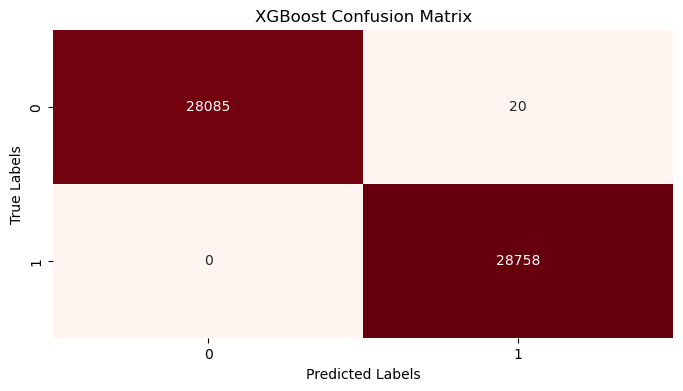

In [91]:
#Ploting confusion matrix
plt.figure(figsize=(8, 4))
conf_matrix_xgb_model = confusion_matrix(y_test, y_pred_binary)  # Assuming y_pred_binary contains XGBoost model predictions
sns.heatmap(conf_matrix_xgb_model, annot=True, fmt='d', cmap="Reds", cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In summary, all four models show remarkable resilience, accuracy, and precision in detecting credit card fraud, making them extremely trustworthy instruments for credit card transaction fraud detection. Still, the XGBoost model is the best option for credit card fraud detection due to its outstanding accuracy, consistency, faultless performance, and low misclassification rate.